In [2]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#menyimpan lokasi atau jalur folder
path = "/content/gdrive/MyDrive/dataset_sahrul/"

In [6]:
import pandas as pd

# Use the 'path' variable to specify the full path to your CSV files
df = pd.read_csv(path + 'Student_Performance.csv', sep = ',')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Pilih variabel independen (X) dan dependen (y)
x = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].to_numpy()
y = df['Performance Index'].to_numpy()

# Tambahkan konstanta untuk intercept
x = sm.add_constant(x)
# Bangun model regresi linier
model_prediksi = sm.OLS(y, x).fit()

# Cetak ringkasan model
print(model_prediksi.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.147e+05
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:08:03   Log-Likelihood:                -21418.
No. Observations:               10000   AIC:                         4.285e+04
Df Residuals:                    9995   BIC:                         4.288e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.7637      0.127   -266.189      0.0

In [21]:
# Membuat DataFrame Evaluasi
df_eval = pd.DataFrame()
df_eval['Sample ID'] = df.index
df_eval['Performance Real'] = df['Performance Index']
df_eval['Performance Predicted'] = df['Predicted Performance Index']
df_eval['ERROR'] = df_eval['Performance Real'] - df_eval['Performance Predicted']
df_eval['PERCENT PREDICTED'] = 1.0 - (abs(df_eval['ERROR']) / df_eval['Performance Real'])
df_eval['PERCENTAGE'] = df_eval['PERCENT PREDICTED'] * 100

df_eval.head()


,Sample ID,Performance Real,Performance Predicted,ERROR,PERCENT PREDICTED,PERCENTAGE
0,0,91.0,91.852009,-0.852009,0.990637,99.063727
1,1,65.0,63.157787,1.842213,0.971658,97.165826
2,2,45.0,45.052832,-0.052832,0.998826,99.882595
3,3,36.0,36.551201,-0.551201,0.984689,98.468887
4,4,66.0,67.091339,-1.091339,0.983465,98.346455


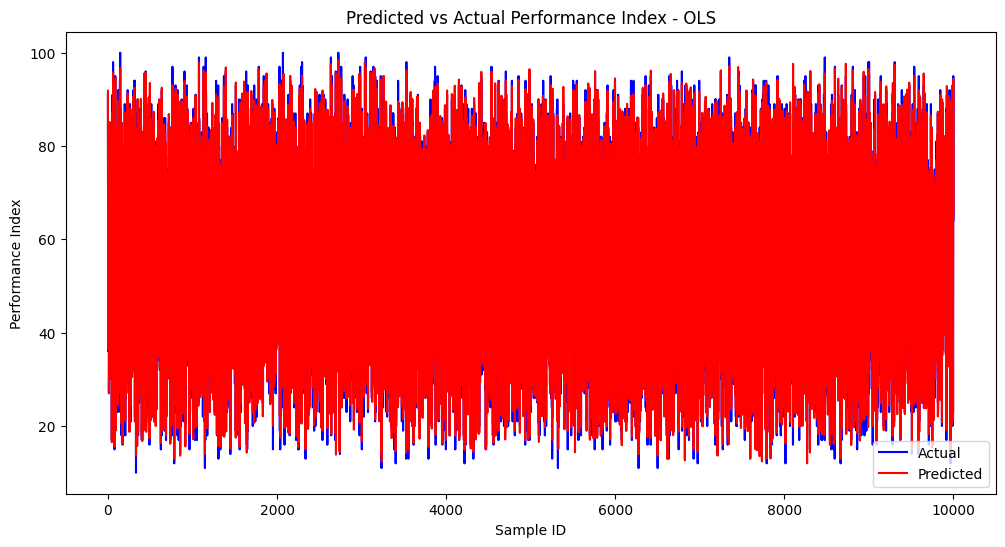

In [22]:
plt.figure(figsize=(12,6))
x = df_eval['Sample ID']
plt.plot(x, df_eval['Performance Real'], label='Actual', color='b')
plt.plot(x, df_eval['Performance Predicted'], label='Predicted', color='r')

plt.legend()
plt.xlabel('Sample ID')
plt.ylabel('Performance Index')
plt.title('Predicted vs Actual Performance Index - OLS')
plt.show()


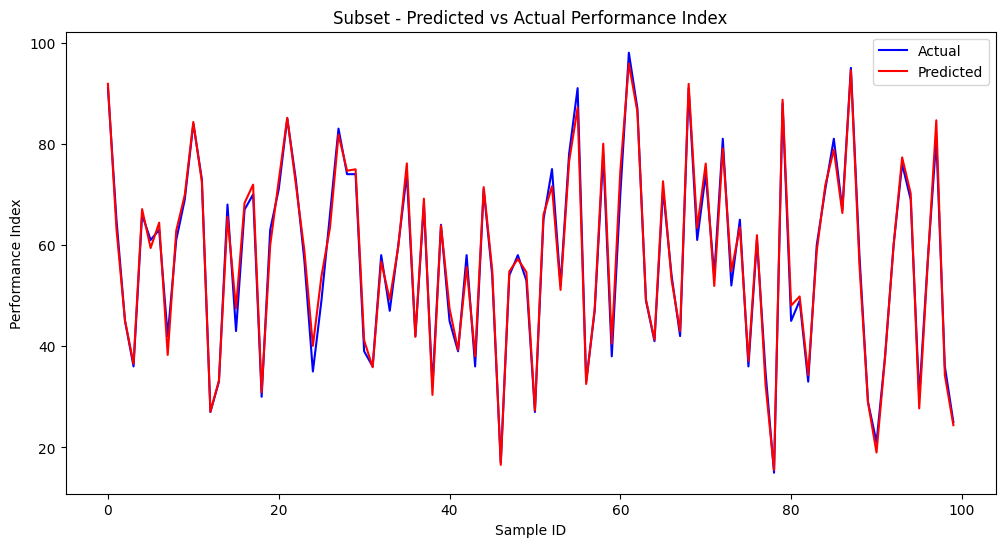

In [19]:
plt.figure(figsize=(12,6))
x_subset = df_eval['Sample ID'][:100]
plt.plot(x_subset, df_eval['Performance Real'][:100], label='Actual', color='b')
plt.plot(x_subset, df_eval['Performance Predicted'][:100], label='Predicted', color='r')

plt.legend()
plt.xlabel('Sample ID')
plt.ylabel('Performance Index')
plt.title('Subset - Predicted vs Actual Performance Index')
plt.show()

In [20]:
print("Mean Absolute Error (MAE):", abs(df_eval['ERROR']).mean())
print("Mean Percentage Error (MPE):", (df_eval['PERCENTAGE']).mean())


Mean Absolute Error (MAE): 1.617482277939708
Mean Percentage Error (MPE): 96.54355148992764
